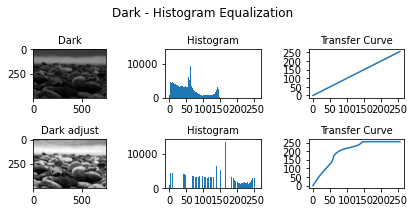

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 讀入圖片
img_d = cv2.imread('dark.jpg',0)
img_d = cv2.resize(img_d, None, fx = 0.5, fy = 0.5)
img_b = cv2.imread('bright.jpg',0)
img_b = cv2.resize(img_b, None, fx = 0.5, fy = 0.5)
img_l = cv2.imread('low_contrast.jpg',0)
img_l = cv2.resize(img_l, None, fx = 0.5, fy = 0.5)
img_h = cv2.imread('high_contrast.jpg',0)
img_h = cv2.resize(img_h, None, fx = 0.5, fy = 0.5)

# 設定繪製子圖表的個數
p_r, p_c = 3,3

# 定義直方圖均衡化的函數
def histogramEqualization(img):
    
    # 得到讀入圖片的長與寬
    row, col = img_d.shape

    # 取得此張圖片的原始直方圖
    his_cur, bins = np.histogram(img.flatten(),256,[0,256])
    
    # 得到每個灰階的累積和
    his_normalized = his_cur.cumsum()
    # print(his_adj)
    
    # 做Equalization
    his_normalized = (his_normalized - his_normalized.min()) / (his_normalized.max() - his_normalized.min()) * 255
    
    # 將numpy的資料型態轉換，讓他得以顯示
    his_normalized = his_normalized.astype('float32')
    
    # 將舊的圖片與轉換過的值重新匹配
    img_normal = np.zeros(img.shape, dtype='uint8') 
    for i in range(row):
        for j in range(col):
            img_normal[i,j] = his_normalized[img[i,j]]

    return img_normal, his_normalized

# 定義顯示函數
def display(title, img_o, img, his_adj, i):
    
    # 說明子圖表為何
    plt.subplot(p_r,p_c,i)
    plt.title(title, fontsize = 10)
    # 顯示原始圖片
    plt.imshow(cv2.cvtColor(img_o, cv2.COLOR_GRAY2RGB))
    
    plt.subplot(p_r,p_c,i+1)
    plt.title('Histogram', fontsize = 10)
    # 顯示原始圖片的直方圖
    plt.hist(img_o.ravel(),256,[0,256])
    # 設置此子圖表的x座標
    plt.xticks([0, 50, 100, 150, 200, 250])
    
    plt.subplot(p_r, p_c,i+2)
    plt.title('Transfer Curve', fontsize = 10)
    x = np.linspace(0,255)
    y = x
    plt.plot(x, y)
    plt.yticks([0, 50, 100, 150, 200, 250])
    plt.xticks([0, 50, 100, 150, 200, 250])

    plt.subplot(p_r,p_c,i+3)
    plt.title(title + ' adjust', fontsize = 10)
    # 顯示原始圖片
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

    plt.subplot(p_r,p_c,i+4)
    plt.title('Histogram', fontsize = 10)
    # 顯示原始圖片的直方圖
    plt.hist(img.ravel(),256,[0,256])
    # 設置此子圖表的x座標
    plt.xticks([0, 50, 100, 150, 200, 250])

    plt.subplot(p_r,p_c,i+5)
    plt.title('Transfer Curve', fontsize = 10)
    # 繪製轉換曲線
    plt.plot(his_adj)
    # 設置此子圖表的y座標
    plt.yticks([0, 50, 100, 150, 200, 250])
    # 設置此子圖表的x座標
    plt.xticks([0, 50, 100, 150, 200, 250])

# 將dark圖片做histogramEqualization，並顯示出來
img, h = histogramEqualization(img_d)
display('Dark', img_d, img, h, 1)


# 設置圖表標題
plt.suptitle('Dark - Histogram Equalization')
# 調整子圖表間距
plt.tight_layout()
# 將圖表存檔
plt.savefig('./Histogram Equalization01.jpg', dpi = 500)
plt.show()

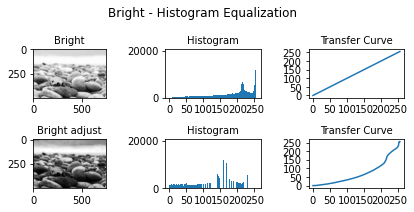

In [3]:
# 將bright圖片做histogramEqualization，並顯示出來
img, h = histogramEqualization(img_b)
display('Bright', img_b,img, h, 1)

# 設置圖表標題
plt.suptitle('Bright - Histogram Equalization')
# 調整子圖表間距
plt.tight_layout()
# 將圖表存檔
plt.savefig('./Histogram Equalization02.jpg', dpi = 500)
plt.show()

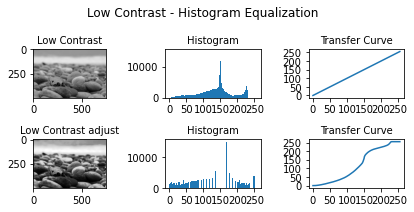

In [4]:
# 將low_contrast圖片做histogramEqualization，並顯示出來
img, h = histogramEqualization(img_l)
display('Low Contrast',img_l ,img, h, 1)

# 設置圖表標題
plt.suptitle('Low Contrast - Histogram Equalization')
# 調整子圖表間距
plt.tight_layout()
# 將圖表存檔
plt.savefig('./Histogram Equalization03.jpg', dpi = 500)
plt.show()

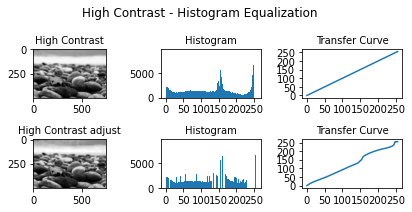

In [5]:
# 將high_contrast圖片做histogramEqualization，並顯示出來
img, h = histogramEqualization(img_h)
display('High Contrast', img_h,img, h, 1)

# 設置圖表標題
plt.suptitle('High Contrast - Histogram Equalization')
# 調整子圖表間距
plt.tight_layout()
# 將圖表存檔
plt.savefig('./Histogram Equalization04.jpg', dpi = 500)
plt.show()

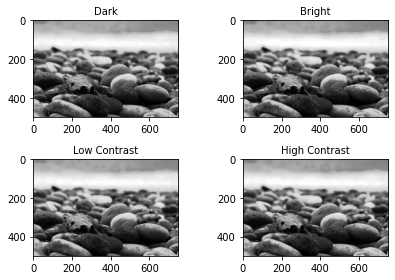

In [8]:
# 繪製四張結果圖的對比

plt.subplot(2,2,1)
img, h = histogramEqualization(img_d)
plt.title('Dark', fontsize = 10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

plt.subplot(2,2,2)
img, h = histogramEqualization(img_b)
plt.title('Bright', fontsize = 10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

plt.subplot(2,2,3)
img, h = histogramEqualization(img_l)
plt.title('Low Contrast', fontsize = 10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

plt.subplot(2,2,4)
img, h = histogramEqualization(img_h)
plt.title('High Contrast', fontsize = 10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

plt.tight_layout()
# 將圖表存檔
plt.savefig('./Histogram Equalization05.jpg', dpi = 500)
plt.show()